1 iterations: theta0 = 9.198, theta1 = 2.236, difference = 76150.7665
2 iterations: theta0 = 17.597, theta1 = 4.060, difference = 73135.1961
3 iterations: theta0 = 25.828, theta1 = 5.849, difference = 70239.0423
4 iterations: theta0 = 33.895, theta1 = 7.601, difference = 67457.5763
5 iterations: theta0 = 41.800, theta1 = 9.319, difference = 64786.2562
6 iterations: theta0 = 49.547, theta1 = 11.002, difference = 62220.7205
7 iterations: theta0 = 57.139, theta1 = 12.652, difference = 59756.7800
8 iterations: theta0 = 64.579, theta1 = 14.268, difference = 57390.4115
9 iterations: theta0 = 71.871, theta1 = 15.852, difference = 55117.7512
10 iterations: theta0 = 79.016, theta1 = 17.405, difference = 52935.0882
11 iterations: theta0 = 86.019, theta1 = 18.926, difference = 50838.8587
12 iterations: theta0 = 92.881, theta1 = 20.418, difference = 48825.6399
13 iterations: theta0 = 99.607, theta1 = 21.879, difference = 46892.1446
14 iterations: theta0 = 106.198, theta1 = 23.311, difference = 450

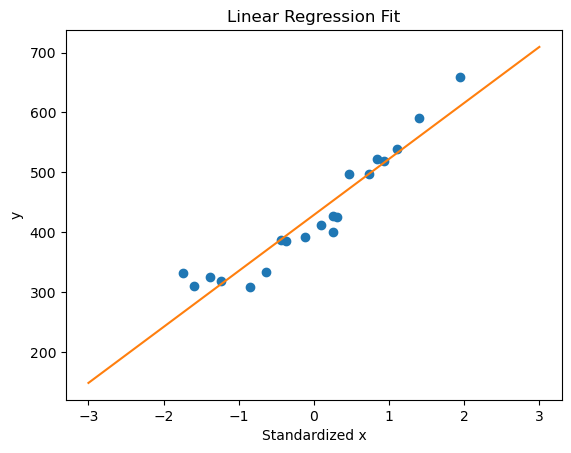

f(standardize(100)) = [370.96732783]
f(standardize(200)) = [510.46980941]
f(standardize(300)) = [649.97229099]


In [3]:
"""
Optimization Details:

1.Data Load Error Handling: Handles errors that may occur during data loading.
2.Training Loop Error Handling: Manages overflow and other exceptions that may arise during the training process.
3.Visualization Error Handling: Deals with errors that may occur during the visualization process.
4.Validation Error Handling: Addresses errors that may occur while computing prediction values.
"""
import numpy as np
import matplotlib.pyplot as plt

# Set the data file path
file_path = 'click.csv'

try:
    # Load training data
    train = np.loadtxt(file_path, delimiter=',', dtype='int', skiprows=1)
    train_x = train[:, 0]
    train_y = train[:, 1]
except Exception as e:
    print(f"Error loading data from {file_path}: {e}")
    exit(1)

# Initialize parameters
theta0 = np.random.rand()
theta1 = np.random.rand()

# Define prediction function
def f(x):
    return theta0 + theta1 * x

# Define objective function (error calculation)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# Define standardization function
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# Learning rate and initial settings
ETA = 1e-3
diff = 1
count = 0
error = E(train_z, train_y)

# Training loop (until error difference is below 0.01)
while diff > 1e-2:
    try:
        # Update parameters
        tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
        tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

        # Update parameter values
        theta0, theta1 = tmp_theta0, tmp_theta1

        # Calculate new error
        current_error = E(train_z, train_y)
        diff = error - current_error
        error = current_error

        # Print training log
        count += 1
        log = '{} iterations: theta0 = {:.3f}, theta1 = {:.3f}, difference = {:.4f}'
        print(log.format(count, theta0, theta1, diff))
    except OverflowError as e:
        print(f"Overflow error: {e}")
        break
    except Exception as e:
        print(f"An error occurred: {e}")
        break

# Visualize training result
try:
    x = np.linspace(-3, 3, 100)
    plt.plot(train_z, train_y, 'o')
    plt.plot(x, f(x))
    plt.xlabel('Standardized x')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")

# Validation example
try:
    for val in [100, 200, 300]:
        standardized_val = standardize(np.array([val]))
        prediction = f(standardized_val)
        print(f"f(standardize({val})) = {prediction}")
except Exception as e:
    print(f"Error during validation: {e}")